In [2]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_excel('data/ATPhiring.xlsx', sheet_name='2007-2024')

# Melt the dataframe to have a long format
melted_data = pd.melt(data, id_vars=['Year', 'Airline'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                      var_name='Month', value_name='Count')

# Create a 'Date' column by combining 'Year' and 'Month'
melted_data['Date'] = pd.to_datetime(melted_data['Year'].astype(str) + '-' + melted_data['Month'] + '-01')

# Select only the required columns
pivoted_data = melted_data[['Airline', 'Date', 'Count']]

# Fill missing values with 0
pivoted_data = pivoted_data.fillna(0)

pivoted_data.describe()

,Date,Count
count,2352,2352.000000
mean,2016-03-11 04:07:20.816326400,29.253401
min,2007-01-01 00:00:00,0.000000
25%,2011-03-01 00:00:00,0.000000
50%,2016-08-16 12:00:00,12.000000
75%,2021-01-08 18:00:00,40.000000
max,2024-12-01 00:00:00,302.000000
std,NaN,45.815949


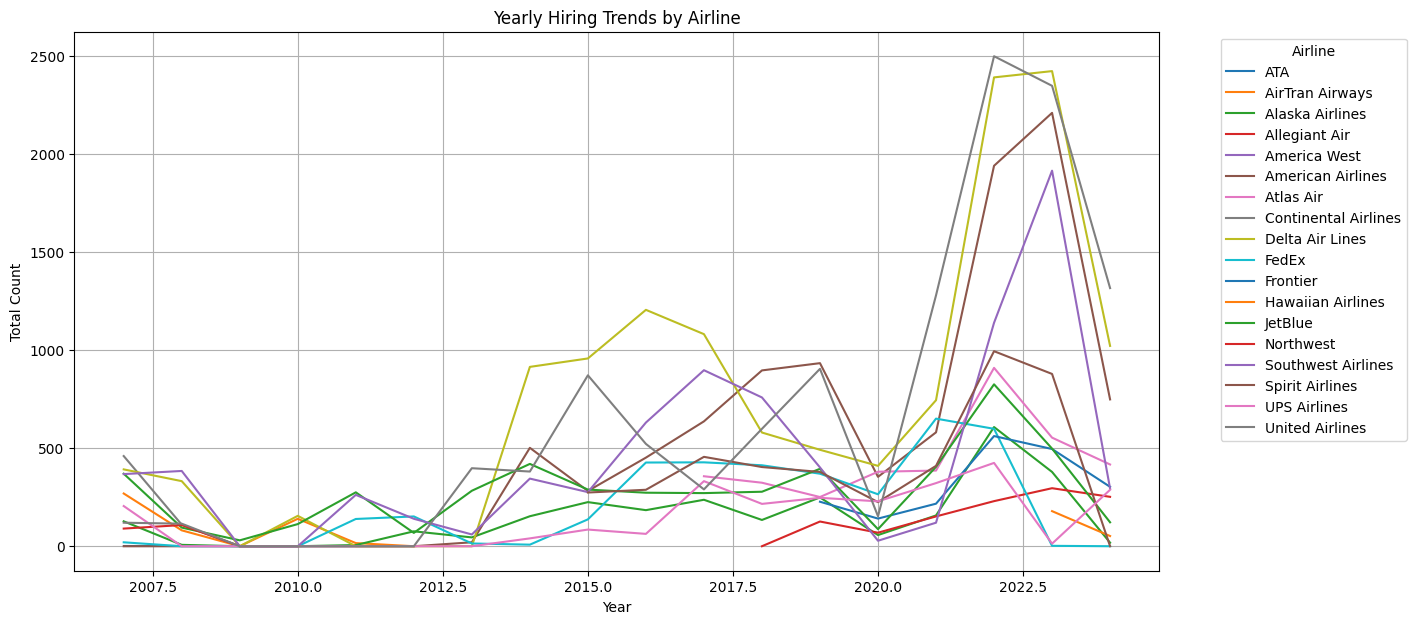

In [3]:
import matplotlib.pyplot as plt

# Aggregate the totals for each airline for each year
yearly_totals = melted_data.groupby(['Year', 'Airline'])['Count'].sum().reset_index()

# Pivot the data to have years as index and airlines as columns
pivot_table = yearly_totals.pivot(index='Year', columns='Airline', values='Count')

# Plot the data
pivot_table.plot(kind='line', figsize=(14, 7))
plt.title('Yearly Hiring Trends by Airline')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

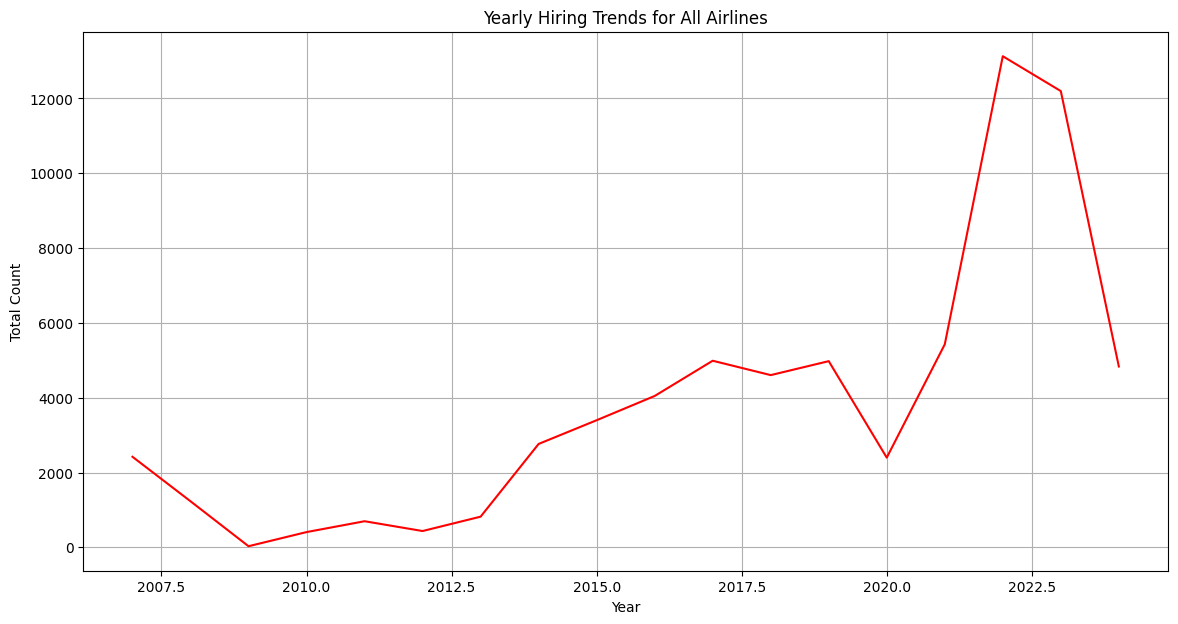

In [4]:
# Create a graph for the yearly totals for all airlines
yearly_totals.groupby('Year')['Count'].sum().plot(kind='line', figsize=(14, 7), color='red')
plt.title('Yearly Hiring Trends for All Airlines')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.grid(True)
plt.show()

In [5]:
import plotly.express as px

# Create the plotly figure
fig = px.line(yearly_totals, x='Year', y='Count', color='Airline', title='Yearly Hiring Trends by Airline')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Count',
    legend_title='Airline',
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    ),
    width=1000,
    height=600
)

# Show the plot
fig.show()

In [6]:
yearly_totals.to_csv('data/ATP_hiring_yearly_totals.csv', index=False)

In [7]:
# Read the 'Certificates by year' sheet of 'data/ATP_certificate_stats.xlsx' into a dataframe
certificates = pd.read_excel('data/ATP_certificate_stats.xlsx', sheet_name='Certificates by year')

# Display the first few rows of the dataframe
certificates.head()

,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1936,1935,1934,1933,1932,1931,1930,1929,1928,1927
0,174113,166738,163934,164193,164947,162145,159825,157894,154730,152933,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [8]:
# Transform the certificates DataFrame to have 'Year' as a column
certificates_long = certificates.melt(var_name='Year', value_name='Total')

# Create a graph showing the number of certificates issued each year
fig = px.bar(certificates_long, x='Year', y='Total', title='Number of Certificates Issued Each Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Total Certificates Issued')
fig.show()

In [9]:
# Read the 'Certificates by age group' sheet of 'data/ATP_certificate_stats.xlsx' into a dataframe
age_groups = pd.read_excel('data/ATP_certificate_stats.xlsx', sheet_name='Certificates by age group')

# Display the first few rows of the dataframe
age_groups

,Age Group,Airline Transport 1/
0,20-24,1945
1,25-29,9606
2,30-34,13331
3,35-39,18027
4,40-44,21005
5,45-49,20310
6,50-54,22861
7,55-59,24784
8,60-64,22511
9,65-69,12467


In [10]:
# Graph the number of certificates issued for each age group
fig = px.bar(age_groups, x='Age Group', y='Airline Transport 1/', title='Number of Certificates Issued for Each Age Group')
fig.update_layout(xaxis_title='Age Group', yaxis_title='Total Certificates Issued')
fig.show()

# Conclusions

Several key points emerge about the future of ATP (Airline Transport Pilot) hiring:

## 1. Recent Hiring Surge, Followed by a Slight Correction
The airline‐by‐airline hiring chart shows a pronounced spike in total hires around the 2020–2022 period. That surge likely reflects a combination of post‐pandemic demand recovery, pent‐up recruiting needs, and anticipated retirements. Although some airlines appear to taper off slightly in 2023–2024, most remain above pre‐2018 hiring baselines, suggesting that the industry has not simply returned to its “old normal” but is instead settling at a relatively higher hiring rate.

## 2. High Proportion of Older Certificate Holders
The bar chart by age group shows a large contingent of certificate holders in the 50–59 and 60–64 brackets. This clustering of older pilots underscores that a sizable wave of retirements is imminent—an important factor keeping hiring demand elevated. Once these pilots begin to retire in significant numbers, it will create additional staffing gaps, even if total air travel growth plateaus.

## 3. Historic High in Pilot Certificate Issuance
The long‐term chart of certificates issued each year indicates that overall pilot certificates (including ATPs) are at or near an all‐time high. This suggests that more people are entering the pilot pipeline than in decades past. However, even with this record‐setting influx, the retirement trend from the older age groups likely means that near‐ to medium‐term replacement needs will remain strong.

## Overall Hiring Outlook
Given the post‐pandemic demand recovery, anticipated retirements of a disproportionately large cohort of current captains, and the continued expansion of regional and low‐cost carriers, the long‐term outlook remains favorable for aspiring airline pilots. While there may be year‐to‐year fluctuations—particularly if economic cycles slow travel demand—structural factors (demographics, retirements, and continued growth in commercial aviation) suggest sustained hiring pressure for years to come.

# Worldwide Business Jet Shipments by Manufacturer (1996-2023)

In [19]:
# Read the 'data/1.03-a-General-Aviation-Aircraft-Shipments-and-Billings-BusinessJets-1996-2023-2024-04-25.xlsx' file into a dataframe
aircraft_data = pd.read_excel('data/1.03-a-General-Aviation-Aircraft-Shipments-and-Billings-BusinessJets-1996-2023-2024-04-25.xlsx', sheet_name='1.3a', skiprows=1)

aircraft_data.columns = ['Make', 'Model'] + list(aircraft_data.columns[2:])

# Forward fill the missing values in the 'Make' column
aircraft_data['Make'] = aircraft_data['Make'].ffill()

# Drop rows where 'Model' is missing
aircraft_data = aircraft_data.dropna(subset=['Model'])

# Drop the last two rows
aircraft_data = aircraft_data[:-2]

# Display the first few rows of the dataframe
aircraft_data

,Make,Model,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Airbus,Airbus Corporate Jet (all models),-,-,-,-,0,5,2,0,...,-,-,-,-,-,-,-,-,-,-
2,Airbus,ACJ220-100,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,2,1
3,Airbus,ACJ318,-,-,-,-,-,-,-,-,...,0,1,0,0,0,0,0,0,-,-
4,Airbus,ACJ319,-,-,-,-,-,-,-,-,...,1,1,0,0,0,0,-,-,-,-
5,Airbus,ACJ319neo,-,-,-,-,-,-,-,-,...,-,-,-,-,-,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Textron Aviation (Cessna Aircraft),CE-680 Citation Sovereign+,-,-,-,-,-,-,-,-,...,28,18,11,9,6,8,6,3,-,-
121,Textron Aviation (Cessna Aircraft),CE-680A Citation Latitude,-,-,-,-,-,-,-,-,...,-,16,42,54,57,58,26,34,42,41
122,Textron Aviation (Cessna Aircraft),CE-700 Citation Longitude,-,-,-,-,-,-,-,-,...,-,-,-,-,-,13,18,24,26,24
123,Textron Aviation (Cessna Aircraft),CE-750 Citation X,7,28,30,36,37,34,31,18,...,-,-,-,-,-,-,-,-,-,-


In [31]:
# Melt the dataframe to have a long format
aircraft_data_long = aircraft_data.melt(id_vars=['Make', 'Model'], var_name='Year', value_name='Shipments')

# Replace `-` with 0 in the 'Shipments' column
aircraft_data_long['Shipments'] = aircraft_data_long['Shipments'].replace('-', 0)

# Replace missing values with 0 in the 'Shipments' column
aircraft_data_long['Shipments'] = aircraft_data_long['Shipments'].fillna(0)

# Convert the 'Year' column to numeric
aircraft_data_long['Year'] = pd.to_numeric(aircraft_data_long['Year'], errors='coerce')

aircraft_data_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       3108 non-null   object 
 1   Model      3108 non-null   object 
 2   Year       3108 non-null   int64  
 3   Shipments  3108 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 97.3+ KB


/var/folders/8y/0ldkfh015gjc7lvpvxd7pr380000gn/T/ipykernel_91459/100178313.py:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [37]:
import plotly.express as px

# Sort the data by 'Year'
aircraft_data_long = aircraft_data_long.sort_values('Year')

# Create the plotly figure
fig = px.line(aircraft_data_long, x='Year', y='Shipments', color='Model', title='Worldwide Business Jet Shipments by Model (1996-2023)')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Shipments',
    legend_title='Model',
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    ),
    width=1600,  # Increase the width
    height=600
)

# Show the plot
fig.show()

In [38]:
# Group by 'Make' and 'Year', then sum the 'Shipments'
make_yearly_totals = aircraft_data_long.groupby(['Make', 'Year'])['Shipments'].sum().reset_index()

# Create the plotly figure
fig = px.line(make_yearly_totals, x='Year', y='Shipments', color='Make', title='Yearly Shipments by Make')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Shipments',
    legend_title='Make',
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    ),
    width=1000,
    height=600
)

# Show the plot
fig.show()